In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('final_study_peaks_filtered_id_dropped.csv')
print(df)

      Unnamed: 0       1283_x        631_x        2449_x       1971_x  \
0              1  392240.3280  869811.0471  101365.84840  201229.7572   
1              2  469986.0035  960851.6726  115178.13340  212293.2393   
2              3  456690.0964  963464.5813  118998.03250  192697.7225   
3              4  350158.6874  722102.1365  115356.33950  158454.2650   
4              5  351953.1304  832597.1489  119386.42000  183054.7118   
...          ...          ...          ...           ...          ...   
3355        3387  263798.3923  645366.5959   58211.83258  124006.3583   
3356        3388  281137.5911  551761.6056   40440.41244  124808.2790   
3357        3389  285681.0570  634466.4918   60175.47536  124010.1444   
3358        3390  269072.1611  665499.1565   52367.01680  139652.9003   
3359        3391  303126.3901  692845.8314   70175.81005  137031.5915   

           1289_x       1407_x       1666_x        997_x       1448_x  ...  \
0     348951.3905  247034.5241  203701.8145  

In [3]:
#drop unnecessary columns
df.drop(columns = ['Unnamed: 0'], inplace = True)
print(df.shape)

(3360, 140)


In [4]:
#clean data by deleting rows that have more than 30% N/A
count = df.isna().sum(axis = 1)
threshold = df.shape[1] * 0.3
df = df[count <= threshold]

zero_tf = (df > -0.0009) & (df < 0.0009)
zero_count = zero_tf.sum(axis = 0)
tf1 = zero_count >= threshold
df.drop(columns = tf1[tf1].index, inplace = True)

print(df.shape)
print(df)

(3360, 140)
           1283_x        631_x        2449_x       1971_x       1289_x  \
0     392240.3280  869811.0471  101365.84840  201229.7572  348951.3905   
1     469986.0035  960851.6726  115178.13340  212293.2393  348114.0237   
2     456690.0964  963464.5813  118998.03250  192697.7225  392556.5559   
3     350158.6874  722102.1365  115356.33950  158454.2650  266094.1340   
4     351953.1304  832597.1489  119386.42000  183054.7118  304062.7928   
...           ...          ...           ...          ...          ...   
3355  263798.3923  645366.5959   58211.83258  124006.3583  213637.3340   
3356  281137.5911  551761.6056   40440.41244  124808.2790  216464.7384   
3357  285681.0570  634466.4918   60175.47536  124010.1444  227005.5542   
3358  269072.1611  665499.1565   52367.01680  139652.9003  209823.3456   
3359  303126.3901  692845.8314   70175.81005  137031.5915  235829.6409   

           1407_x       1666_x        997_x       1448_x         546_x  ...  \
0     247034.5241  2

In [5]:
#correlation matrix of cleaned data
pear_corr_matrix = df.corr(method = 'pearson')
print(pear_corr_matrix.shape)
print(pear_corr_matrix)

(140, 140)
          1283_x     631_x    2449_x    1971_x    1289_x    1407_x    1666_x  \
1283_x  1.000000  0.850065  0.387310  0.851302  0.854258  0.303171  0.339069   
631_x   0.850065  1.000000  0.355264  0.800583  0.849387  0.172680  0.187223   
2449_x  0.387310  0.355264  1.000000  0.495841  0.485243  0.533385  0.525009   
1971_x  0.851302  0.800583  0.495841  1.000000  0.871001  0.502796  0.514846   
1289_x  0.854258  0.849387  0.485243  0.871001  1.000000  0.462756  0.475950   
...          ...       ...       ...       ...       ...       ...       ...   
1838_x  0.008244  0.001285 -0.129746  0.031535  0.030430  0.054606  0.022675   
2587_x -0.210933 -0.145606 -0.162859 -0.229498 -0.214425 -0.234056 -0.233324   
3620_x -0.152179 -0.098360 -0.121439 -0.141651 -0.159446 -0.164308 -0.170805   
2483_x -0.126945 -0.084473 -0.032837 -0.099951 -0.118017 -0.079642 -0.103718   
1825_x  0.048780  0.115037  0.122671  0.029519  0.093637 -0.054514 -0.066478   

           997_x    1448_x  

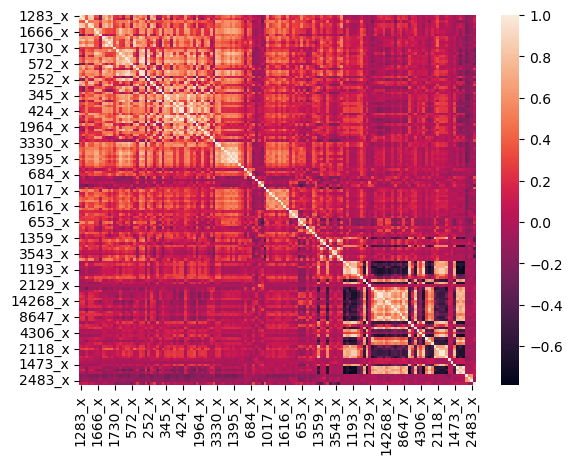

In [6]:
p_hm = sn.heatmap(data = pear_corr_matrix)

In [7]:
pear_corr_matrix.to_csv('pearson_correlation_matrix.csv', index_label='Variables')

In [1]:
# DESCRIPTION FOR PART 1
'''there are some strong positive correlations in the range from (1283_X,1283_x_):(684_X,684_X)
while there is a mix of strong positive and strong negative correlations in the range (3543_X,3543_X):(2483_X,2483_X)

In [8]:
#correlation matrix of cleaned data
spear_corr_matrix = df.corr(method = 'spearman')
print(spear_corr_matrix.shape)
print(spear_corr_matrix)

(140, 140)
          1283_x     631_x    2449_x    1971_x    1289_x    1407_x    1666_x  \
1283_x  1.000000  0.790559  0.411642  0.838811  0.841983  0.340976  0.384426   
631_x   0.790559  1.000000  0.361169  0.763449  0.827624  0.173901  0.188518   
2449_x  0.411642  0.361169  1.000000  0.515416  0.495727  0.527877  0.531500   
1971_x  0.838811  0.763449  0.515416  1.000000  0.858810  0.512718  0.530255   
1289_x  0.841983  0.827624  0.495727  0.858810  1.000000  0.466560  0.486790   
...          ...       ...       ...       ...       ...       ...       ...   
1838_x -0.003179 -0.002547 -0.130284  0.024490  0.023198  0.052807  0.017256   
2587_x -0.217283 -0.120456 -0.160460 -0.214774 -0.206851 -0.212586 -0.222697   
3620_x -0.176654 -0.118075 -0.126606 -0.151425 -0.167366 -0.164769 -0.177444   
2483_x -0.151038 -0.116180 -0.049212 -0.111135 -0.131376 -0.077990 -0.101854   
1825_x  0.098837  0.175917  0.165205  0.061091  0.135067 -0.021543 -0.033945   

           997_x    1448_x  

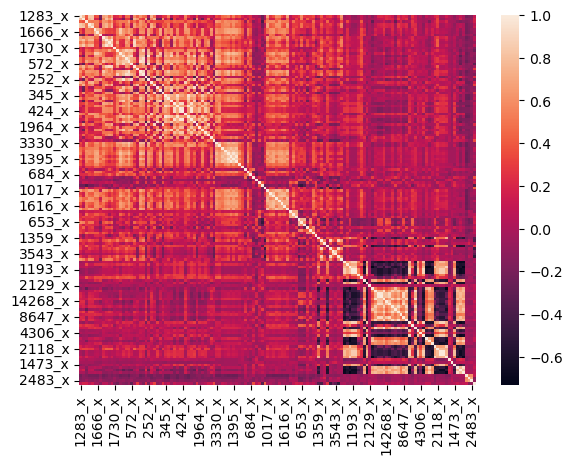

In [9]:
s_hm = sn.heatmap(data = spear_corr_matrix)

In [10]:
spear_corr_matrix.to_csv('spearman_correlation_matrix.csv', index_label='Variables')

In [ ]:
# DESCRIPTION FOR PART 2
''' The correlation heatmap for the two methods of correlation are practically identical, 
however coefficients are slightly differnt from eachother, varrying by around .03 at the most.